In [1]:
%pip install boto3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 9.8 MB/s eta 0:00:00


In [1]:
import boto3
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
from io import BytesIO

In [2]:
s3 = boto3.client('s3',aws_access_key_id='your-key',aws_secret_access_key='your-key')

In [20]:
bucket_name = 'imdb-cs777'
folder_path = 'Average_Rating_Per_Reviewer/'

files = s3.list_objects_v2(Bucket=bucket_name, Prefix=folder_path)

avg_ratings_per_reviewer = pd.DataFrame()

for file in files.get('Contents', []):

    file_name = file['Key']
    if file_name.endswith('.csv'):
      csv_obj = s3.get_object(Bucket=bucket_name, Key=file['Key'])
      body = csv_obj['Body'].read().decode('utf-8')
      temp_df = pd.read_csv(StringIO(body), error_bad_lines=False, names = ['reviewer','avg_rating'],header=0)

      avg_ratings_per_reviewer = pd.concat([avg_ratings_per_reviewer, temp_df], ignore_index=True)

<ipython-input-20-411642a6394e>:17: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  temp_df = pd.read_csv(StringIO(body), error_bad_lines=False, names = ['reviewer','avg_rating'],header=0)


In [23]:
avg_ratings_per_reviewer.head()

,reviewer,avg_rating
0,jfrisby_69,7.000000
1,raidatlanta,4.129032
2,vbagnihotri,9.000000
3,aperisic,4.700000
4,petrogradskaya-1,3.000000


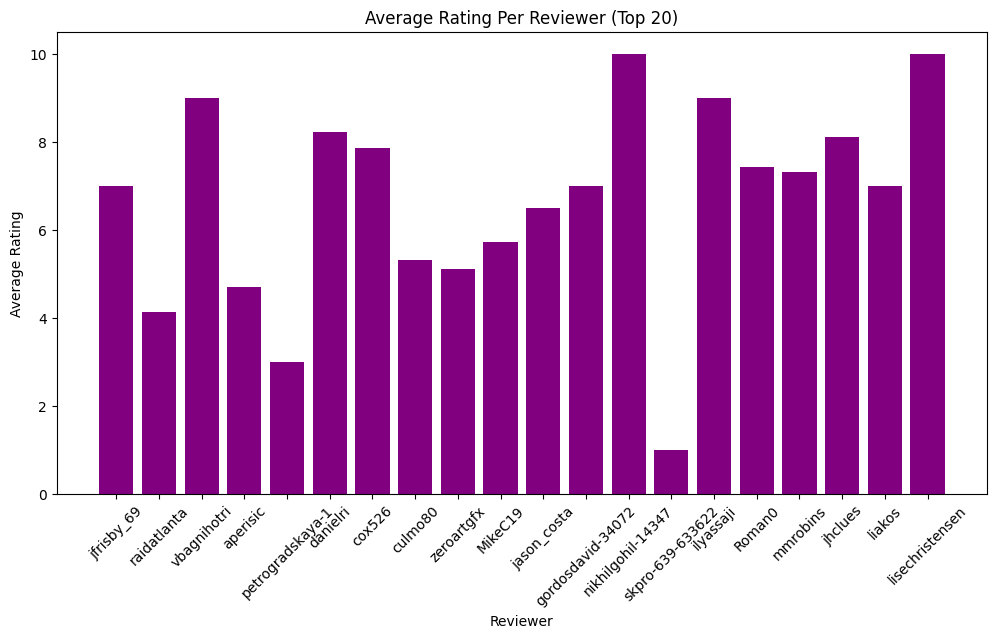

In [25]:
plt.figure(figsize=(12, 6))
plt.bar(avg_ratings_per_reviewer['reviewer'][:20], avg_ratings_per_reviewer['avg_rating'][:20], color='purple')
plt.xlabel('Reviewer')
plt.ylabel('Average Rating')
plt.title('Average Rating Per Reviewer (Top 20)')
plt.xticks(rotation=45)
plt.show()

<ipython-input-28-b96c775b868a>:17: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  temp_df = pd.read_csv(StringIO(body), error_bad_lines=False, names = ['reviewer','avg_sentiment'],header=0)


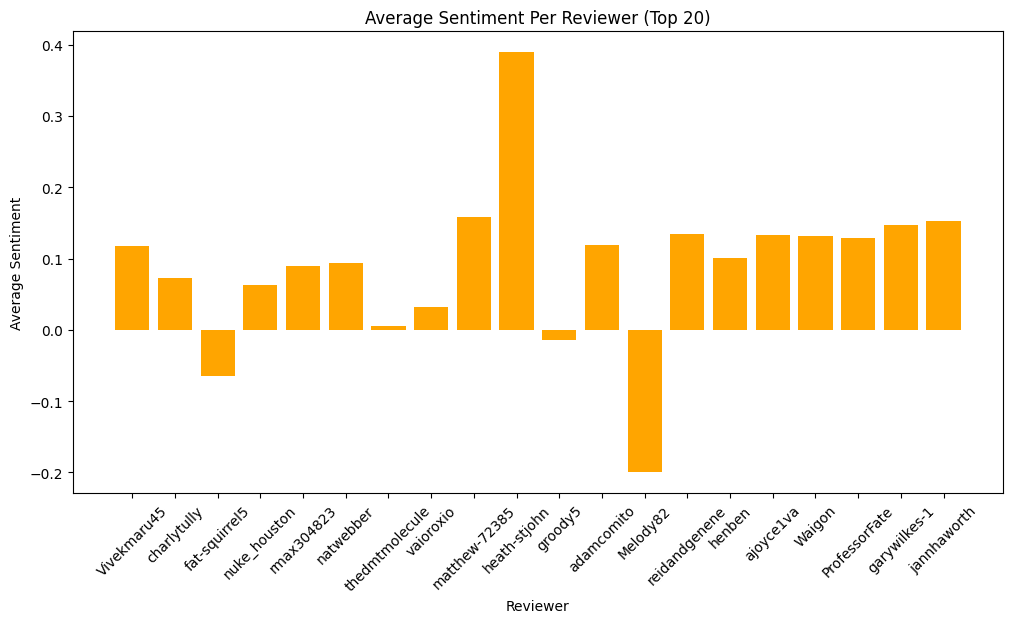

In [28]:
bucket_name = 'imdb-cs777'
folder_path = 'Average_Sentiment_Per_Reviewer/'

files = s3.list_objects_v2(Bucket=bucket_name, Prefix=folder_path)

avg_sentiment_per_reviewer = pd.DataFrame()

for file in files.get('Contents', []):

    file_name = file['Key']
    if file_name.endswith('.csv'):
      csv_obj = s3.get_object(Bucket=bucket_name, Key=file['Key'])
      body = csv_obj['Body'].read().decode('utf-8')
      temp_df = pd.read_csv(StringIO(body), error_bad_lines=False, names = ['reviewer','avg_sentiment'],header=0)

      avg_sentiment_per_reviewer = pd.concat([avg_sentiment_per_reviewer, temp_df], ignore_index=True)

plt.figure(figsize=(12, 6))
plt.bar(avg_sentiment_per_reviewer['reviewer'][:20], avg_sentiment_per_reviewer['avg_sentiment'][:20], color='orange')
plt.xlabel('Reviewer')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment Per Reviewer (Top 20)')
plt.xticks(rotation=45)
plt.show()


In [5]:
bucket_name = 'imdb-cs777'
folder_path = 'Analysed_Reviews/'

files = s3.list_objects_v2(Bucket=bucket_name, Prefix=folder_path)

analysed_reviews = pd.DataFrame()

for file in files.get('Contents', []):

    file_name = file['Key']
    if file_name.endswith('.parquet'):
      obj = s3.get_object(Bucket=bucket_name, Key=file['Key'])
      temp_df = pd.read_parquet(BytesIO(obj['Body'].read()))

      analysed_reviews = pd.concat([analysed_reviews, temp_df], ignore_index=True)

In [31]:
analysed_reviews.head()

,review_id,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,helpful,rating_category,cleaned_review,flesch_score,sentiment_score,review_length
0,rw5704482,raeldor-96879,After Life (2019– ),9.0,Very Strong Season 2,3 May 2020,0,I enjoyed the first season but I must say I th...,"[1, 1]",5.0,i enjoyed the first season but i must say i th...,18.700001,0.272778,391
1,rw5704483,dosleeb,The Valhalla Murders (2019– ),6.0,Icelandic detectives?,3 May 2020,0,I know Iceland is a small country and police d...,"[2, 2]",4.0,i know iceland is a small country and police d...,26.480000,-0.150000,333
2,rw5704484,brightconscious,Special OPS (2020– ),7.0,Nothing special,3 May 2020,0,Except K K no other actor looks comfortable i...,"[0, 0]",4.0,except k k no other actor looks comfortable i...,53.209999,0.178125,102
3,rw5704485,gasconyway,#BlackAF (2020– ),8.0,Good but,3 May 2020,0,Im guessing that as a 62 year old white woman ...,"[5, 9]",5.0,im guessing that as a 62 year old white woman ...,39.680000,0.306944,268
4,rw5704487,mmason-15867,The Droving (2020),2.0,An honest review,3 May 2020,0,Heres the truth Theres not much to this movie ...,"[26, 41]",2.0,heres the truth theres not much to this movie ...,-187.690002,0.119356,1482


In [51]:
len(analysed_reviews[analysed_reviews['review_length'] >= 1000]['cleaned_review'])

1836836

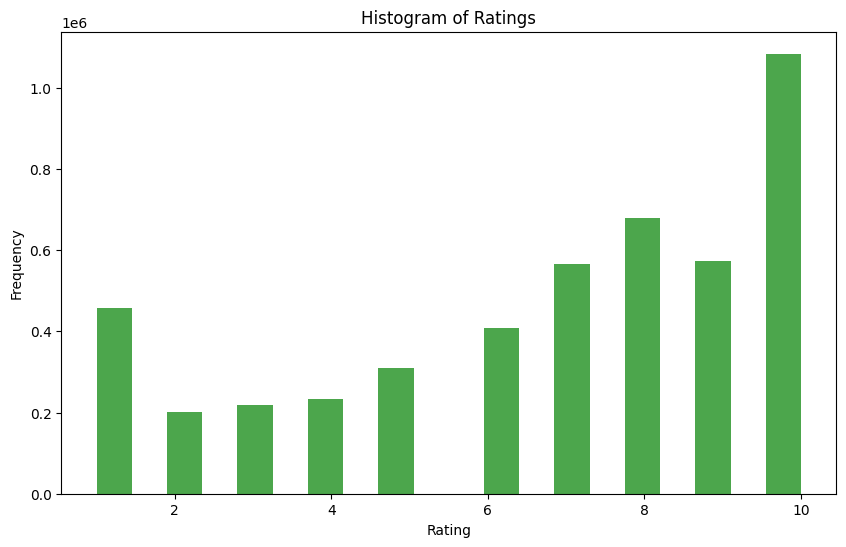

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(analysed_reviews['rating'], bins=20, color='green', alpha=0.7)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.show()

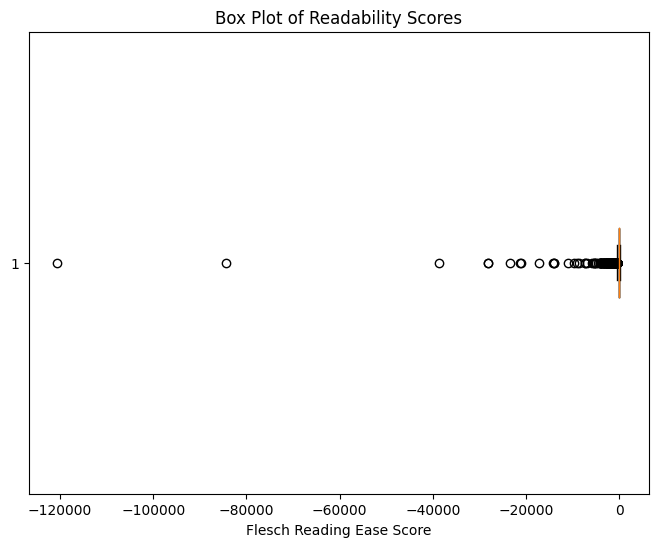

In [33]:
plt.figure(figsize=(8, 6))
plt.boxplot(analysed_reviews['flesch_score'], vert=False)
plt.xlabel('Flesch Reading Ease Score')
plt.title('Box Plot of Readability Scores')
plt.show()

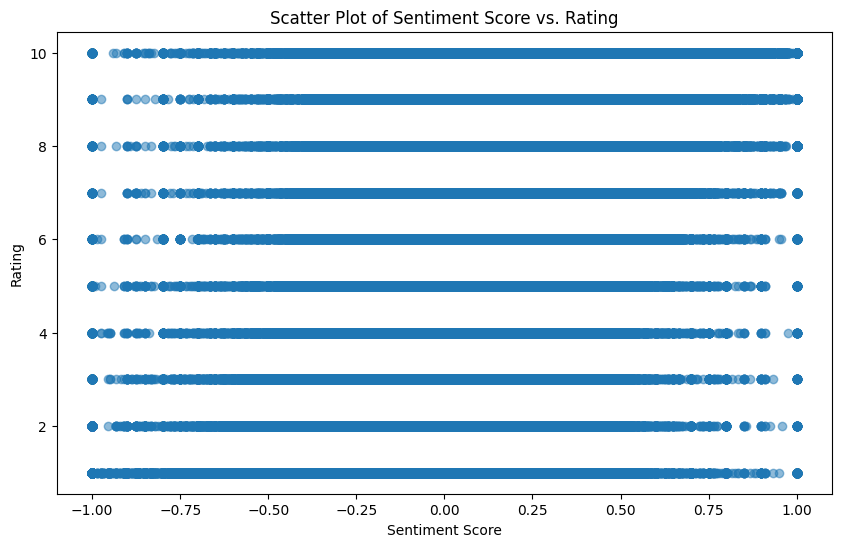

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(analysed_reviews['sentiment_score'], analysed_reviews['rating'], alpha=0.5)
plt.xlabel('Sentiment Score')
plt.ylabel('Rating')
plt.title('Scatter Plot of Sentiment Score vs. Rating')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

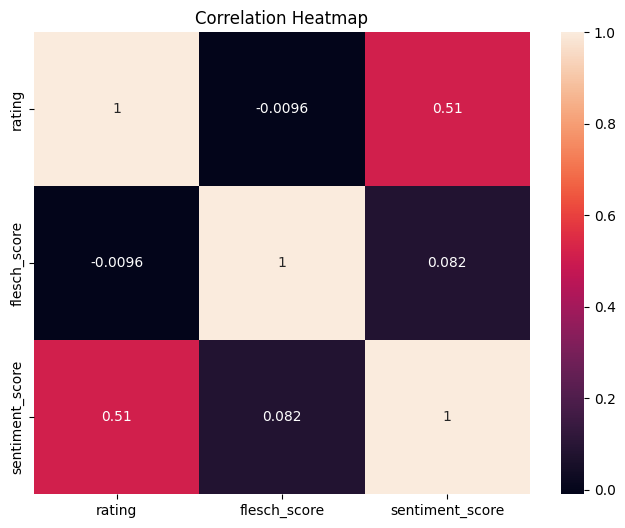

In [36]:
import seaborn as sns

correlation_data = analysed_reviews[['rating', 'flesch_score', 'sentiment_score']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True)
plt.title('Correlation Heatmap')

In [52]:
%pip install wordcloud

In [6]:
bucket_name = 'imdb-cs777'
folder_path = 'Top_20_Words/'

files = s3.list_objects_v2(Bucket=bucket_name, Prefix=folder_path)

top_20_words = pd.DataFrame()

for file in files.get('Contents', []):

    file_name = file['Key']
    if file_name.endswith('.csv'):
      csv_obj = s3.get_object(Bucket=bucket_name, Key=file['Key'])
      body = csv_obj['Body'].read().decode('utf-8')
      temp_df = pd.read_csv(StringIO(body), error_bad_lines=False, names = ['word','count'],header=0)

      top_20_words = pd.concat([top_20_words, temp_df], ignore_index=True)

<ipython-input-6-cec755002da5>:17: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  temp_df = pd.read_csv(StringIO(body), error_bad_lines=False, names = ['word','count'],header=0)


In [15]:
df_cleaned = top_20_words.dropna(subset=['word'])
df_sorted = df_cleaned.sort_values('count', ascending=False).head(20)
df_sorted = df_sorted[df_sorted['word'] != 'nan']

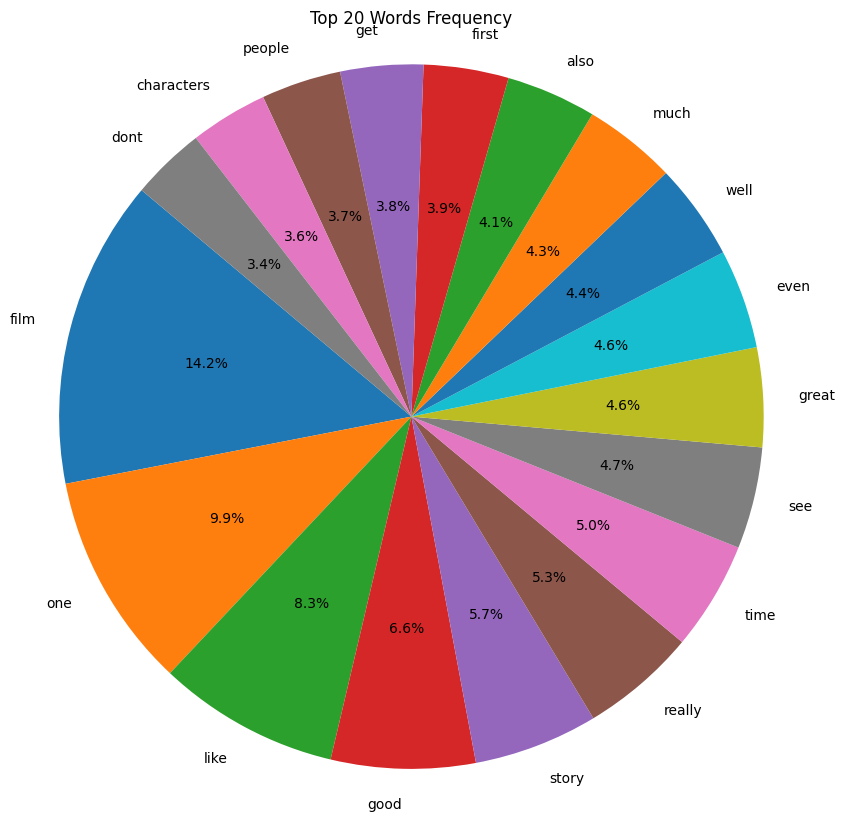

In [16]:
plt.figure(figsize=(10, 10))
plt.pie(df_sorted['count'], labels=df_sorted['word'], autopct='%1.1f%%', startangle=140)
plt.title('Top 20 Words Frequency')
plt.axis('equal')

plt.show()